In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import cm

import rioxarray as rio
from shapely.geometry import mapping

%matplotlib inline
# %matplotlib widget

## time-series for median annual precipitation locations

#### select time_series of climate data for the coordinates of the median points

(1) read median precipitation locations 


(2) read climate data 

## read locations of median precip data + hma boundaries

In [2]:
locations = pd.read_csv('out/median_annual_precip_regions.csv').drop('Unnamed: 0', axis =1)#.set_index('Name')
locations_t2m = pd.read_csv('out/annual_median_t2m_regions.csv').drop('Unnamed: 0', axis =1)

hma = gpd.read_file('HMA_regions/HMA_regions.shp')

In [3]:
# locations.longitude.values
# locations_t2m

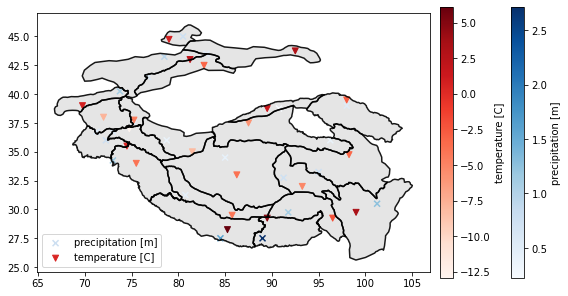

In [4]:
# plot locations: 
fig, ax = plt.subplots(figsize=(10, 10))
# hma bounds
hma.boundary.plot(ax = ax, color='black', alpha = 0.9)
hma.plot(ax = ax, color='grey', alpha = 0.2)

# points
precip = plt.scatter(x = locations.longitude, y = locations.latitude, c = locations.tp_median, 
                     marker = 'x', cmap= cm.Blues, label = 'precipitation [m]')
colorbar1 = plt.colorbar(precip, shrink = 0.5,pad=0.0001)
colorbar1.set_label('precipitation [m]')


temps = plt.scatter(x = locations_t2m.longitude, y = locations_t2m.latitude, c = locations_t2m.t2m_median_C, 
                    marker = 'v', label = 'temperature [C]', cmap = cm.Reds)
colorbar2 = plt.colorbar(temps, shrink = 0.5, pad=0.02)
colorbar2.set_label('temperature [C]')


plt.legend(loc = 'lower left')
# plt.tight_layout()
# plt.title('median annual precipitation sum per region [m]')

# plt.savefig('out/locations_temps_precips.png', dpi = 300)

## read all climate data 

In [5]:
%%time
# ---- read
# t2m_all   = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/*.nc', decode_coords = "all")
# tp_all    = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/*.nc', decode_coords = "all")
# solar_all = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/surface-solar-radiation-downwards/*.nc', decode_coords = "all")
# tcc_all   = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-cloud-cover/*.nc', decode_coords = "all")


# # --- temperatures:
# t2m_2020 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/era5_2m-temperature_hourly_2020.nc', decode_coords = "all")
# t2m_2019 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/era5_2m-temperature_hourly_2020.nc', decode_coords = "all")
# t2m_2018 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/era5_2m-temperature_hourly_2020.nc', decode_coords = "all")
# 
# 
# # --- precipitation:
# tp_2020 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/era5_total-precipitation_hourly_2020.nc', decode_coords = "all")
# tp_2019 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/era5_total-precipitation_hourly_1987.nc', decode_coords = "all")
# tp_2018 = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/era5_total-precipitation_hourly_1987.nc', decode_coords = "all")


# ---- merge
# t2m = xr.merge([t2m_2020])#, t2m_2019, t2m_2018])
# tp = xr.merge([tp_2020])#, tp_2019, tp_2018])

# climate_all = xr.merge([t2m, tp])

# --- units 

#convert temperature K to C
# climate_all['t2m']=climate_all.t2m-273.15
# t2m_all['t2m']=t2m_all.t2m-273.15


# precipotation m to mm 
# climate_all['tp']=climate_all.tp * 1000
# tp_all['tp']=tp_all.tp * 1000

# radiation j/m2 to w/m2
# SSR [W/m2] = SSR [J/m^2] / (3600 seconds)
# climate_all['ssrd'] = climate_all.ssrd / 3600
# solar_all['ssrd'] = solar_all.ssrd / 3600


CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 17.9 µs


In [6]:
# read climate data: 
climate = xr.open_mfdataset('*.nc', decode_coords="all")



In [7]:
# locations.head()

In [8]:
longitude = locations_t2m.longitude[1]
latitude  = locations_t2m.latitude[1]

# locations.longitude


# locations_t2m = locations_t2m.sort_values(by=['latitude', 'longitude'])
# climate

In [9]:
%%time
# climate = climate.sel(longitude = locations_t2m.longitude, latitude = locations_t2m.latitude, method = 'nearest')
climate = climate.sel(longitude = longitude, latitude = latitude, method = 'nearest')



CPU times: user 7.45 ms, sys: 985 µs, total: 8.43 ms
Wall time: 10.7 ms


In [10]:
%%time
climate_df = climate.to_dataframe()#.reset_index()

CPU times: user 28 ms, sys: 248 ms, total: 276 ms
Wall time: 3.22 s


In [11]:
# climate_df_res.latitude.nunique()
# climate_df.head()

In [13]:
# (1) sub-select temperatures and precipitation separately: 
# t2m =  climate_df_res[['latitude', 'longitude', 'time', 't2m']]
# tp =   climate_df[['latitude', 'longitude', 'time', 'tp']]
# tcc =  climate_df[['latitude', 'longitude', 'time',  'tcc']]
# ssrd = climate_df[['latitude', 'longitude', 'time', 'ssrd']]

In [14]:
climate_df_res = climate_df.reset_index()
climate_df_res["coords"] = climate_df_res["latitude"].astype(str) + climate_df_res["longitude"].astype(str)


In [15]:
# lats_and_lons = climate_df_res[['coords']].groupby(['coords']).size().reset_index()
lats_and_lons = climate_df_res[['latitude', 'longitude']].groupby(['latitude', 'longitude']).size().reset_index()
print('how many unique pairs of coordinates there are:', len(lats_and_lons))


how many unique pairs of coordinates there are: 1


In [24]:
climate_df = climate_df_res#.set_index('time')


Text(0, 0.5, 'tp')

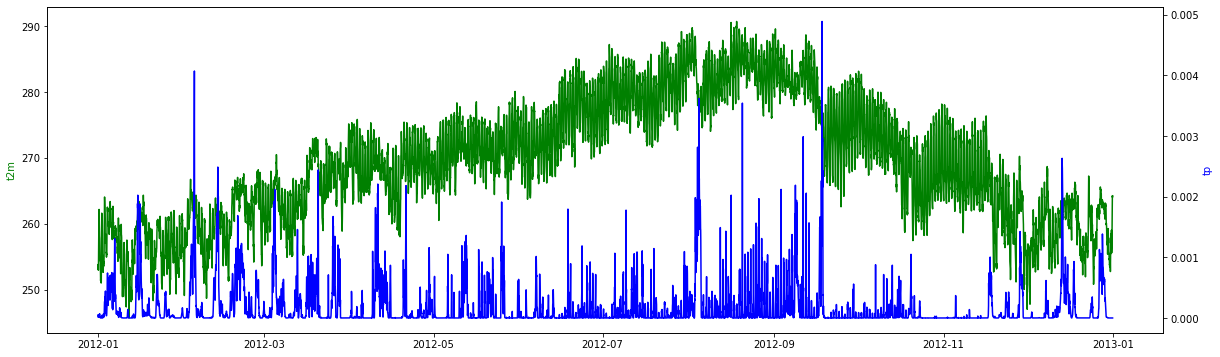

In [25]:
fig, ax1 = plt.subplots(figsize = (20,6))

ax2 = ax1.twinx()
ax1.plot(climate_df.time, climate_df.t2m, 'g-')
ax2.plot(climate_df.time, climate_df.tp, 'b-')


ax1.set_ylabel('t2m', color='g')
ax2.set_ylabel('tp', color='b')

In [ ]:
# ---- attempt to write a function ------
'''
%%time

# ------ clip dates

def selecting(dataset):
    ''' selecting dates and kicking out unnesesery expver'''
    dataset = dataset.sel(time=slice(date_begin, date_end))
    dataset = dataset.sel(expver= slice(0, 1))
    df = dataset.to_dataframe().dropna().drop_duplicates()
    return df


date_begin = '2019-01-01'
date_end = '2020-12-31'

climate_all = selecting(dataset = climate_all)

# ------ temperatures: 
# t2m_all = selecting(dataset = t2m_all)
# tp_all = selecting(dataset = tp_all)
# 
# print(t2m_all)

# all_clim = xr.merge([t2m_all,tp_all])

# df = all_clim.to_dataframe()
'''

In [ ]:
climate_all